<a href="https://colab.research.google.com/github/CoaDiego/SIS420---IA/blob/main/1erParcial/1erparcial_coavelizdiegoarmando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1er Parcial - Inteligencia Artificial
Este conjunto de datos se derivó de un conjunto de datos producido por el Centro de Predicción de Tormentas de la NOAA. Los principales cambios realizados para crear este conjunto de datos fueron la eliminación de algunas columnas, el cambio de algunos tipos de datos y la clasificación por fecha.

El dataset conta con 67,6 k de ejemplos y de 14 columnas donde la columan de clasificacion seria "mag"

Definiciones de columnas

yr - año de 4 dígitos

mn - Mes (1-12)

dy - Día del mes

fecha - Objeto de fecha y hora (por ejemplo, 1950-01-01)

st - Estado donde se originó el tornado; abreviatura de 2 dígitos

mag - Calificación F hasta enero de 2007; calificación EF después de enero de
2007 (-9 si se desconoce la calificación)

inj - Número de lesiones

grasa - Número de víctimas mortales

slat - Latitud inicial en grados decimales

slon - Longitud inicial en grados decimales

elat - Latitud final en grados decimales (valor 0 si falta)

elon - Longitud final en grados decimales (valor 0 si falta)

len - Longitud de la pista en millas

wid - Ancho en yardas

La escala Fujita Enhance (mag)

Clasificación	/ Velocidad del viento	/ Daño

EF0	/ 65–85 mph	  / Daños leves

EF1	/ 86–110 mph	/ Daño moderado

EF2	/ 111–135 mph	/ Daños considerables

EF3	/ 136–165 mph	/ Daños graves

EF4	/ 166–200 mph	/ Daños devastadores


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

import pandas as pd
# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

Pre - Procesamiento de Datos

In [ ]:
# Leer el archivo CSV
datos_ds = pd.read_csv('/content/drive/Othercomputers/Mi PC/Semestre 2-2024/SIS420 - INTELIGENCIA ARTIFICIAL I/SIS420---IA/1erParcial/96.US Tornado Dataset 1950-2021/us_tornado_dataset_1950_2021.csv')

# Convertir la columna 'date' a datetime
datos_ds['date'] = pd.to_datetime(datos_ds['date'])

# Extraer mes y día (sin extraer el año) esto por que ya existe una columna de años "yr"
datos_ds['month'] = datos_ds['date'].dt.month
datos_ds['day'] = datos_ds['date'].dt.day

# Verifica las primeras filas para ver si los días se están asignando correctamente
print(datos_ds[['date', 'day', 'month']].head())

# Eliminar la columna 'date'
datos_ds = datos_ds.drop(columns=['date']) #Eliminando la columna "date" , y  agregando "day" y "month" de las 14 columnas iniciales ahora tengo 15 columnas

#Mostrar el DataFrame para verificar que 'mag' está al final
#print("DataFrame con la columna 'mag' al final:")
#print(datos_ds.head())

#Mostrar el DataFrame para verificar
print("Componentes de fecha extraídos:")
print(datos_ds.head())


        date  day  month
0 1950-01-03    3      1
1 1950-01-03    3      1
2 1950-01-03    3      1
3 1950-01-13   13      1
4 1950-01-25   25      1
Componentes de fecha extraídos:
     yr  mo  dy  st  mag  inj  fat   slat   slon   elat   elon  len  wid  \
0  1950   1   3  IL    3    3    0  39.10 -89.30  39.12 -89.23  3.6  130   
1  1950   1   3  MO    3    3    0  38.77 -90.22  38.83 -90.03  9.5  150   
2  1950   1   3  OH    1    1    0  40.88 -84.58   0.00   0.00  0.1   10   
3  1950   1  13  AR    3    1    1  34.40 -94.37   0.00   0.00  0.6   17   
4  1950   1  25  IL    2    0    0  41.17 -87.33   0.00   0.00  0.1  100   

   month  day  
0      1    3  
1      1    3  
2      1    3  
3      1   13  
4      1   25  


In [ ]:
print(datos_ds.columns)
# Verifica los valores originales de la columna 'mag'
print(datos_ds['mag'].head(10))

Index(['yr', 'mo', 'dy', 'st', 'mag', 'inj', 'fat', 'slat', 'slon', 'elat',
       'elon', 'len', 'wid', 'month', 'day'],
      dtype='object')
0    3
1    3
2    1
3    3
4    2
5    2
6    2
7    2
8    2
9    2
Name: mag, dtype: int64


1.      Inserte atributos que contengan, caracteres, texto, valores booleanos relacionados a la temática del dataset elegido

In [ ]:
# Agregar nuevas columnas:
# 1. Columna de texto: Tipo de tornado
datos_ds['tipo_tornado'] = ['A' if mag in [1, 2] else 'B' if mag in [3, 4] else 'C' for mag in datos_ds['mag']]

#2 Crear una columna booleana 'victimas_M' donde 1 indica víctimas mortales y 0 indica ninguna
datos_ds['victimas_M'] = datos_ds['fat'].apply(lambda x: 1 if x > 0 else 0)

# Mover la nueva columna 'victimas_M' al final
columna_victimas = datos_ds.pop('victimas_M')
datos_ds['victimas_M'] = columna_victimas

# 3.Definir una función para categorizar la longitud del tornado
def categorizar_longitud(longitud):
    if longitud < 1:
        return 'diminuto'
    elif 1 <= longitud < 5:
        return 'pequeño'
    else:
        return 'grande'

# Aplicar la función para crear la columna 'tamaño_torn'
datos_ds['tamaño_torn'] = datos_ds['len'].apply(categorizar_longitud)

# Mover la columna 'tamaño_torn' al final
columna_tamaño_torn = datos_ds.pop('tamaño_torn')
datos_ds['tamaño_torn'] = columna_tamaño_torn

# Mover la columna 'mag' al final del DataFrame
columna_mag = datos_ds.pop('mag')  # Extraer la columna 'mag'
datos_ds['mag'] = columna_mag      # Añadir la columna 'mag' al final

# Mostrar el DataFrame para verificar que la columna 'tamaño_torn' está correctamente añadida y ubicada
print(datos_ds.head())

     yr  mo  dy  st  inj  fat   slat   slon   elat   elon  len  wid  month  \
0  1950   1   3  IL    3    0  39.10 -89.30  39.12 -89.23  3.6  130      1   
1  1950   1   3  MO    3    0  38.77 -90.22  38.83 -90.03  9.5  150      1   
2  1950   1   3  OH    1    0  40.88 -84.58   0.00   0.00  0.1   10      1   
3  1950   1  13  AR    1    1  34.40 -94.37   0.00   0.00  0.6   17      1   
4  1950   1  25  IL    0    0  41.17 -87.33   0.00   0.00  0.1  100      1   

   day tipo_tornado  victimas_M tamaño_torn  mag  
0    3            B           0     pequeño    3  
1    3            B           0      grande    3  
2    3            A           0    diminuto    1  
3   13            B           1    diminuto    3  
4   25            A           0    diminuto    2  


Convertir las columnas de "st" , "tamaño_torn" y "tipo_tornado" a numerico

In [ ]:
# Convertir el DataFrame a un array de NumPy
#data = datos_ds.to_numpy()
# Ahora 'data' es un array de NumPy y puedes realizar operaciones con él

st a valor numerico

In [ ]:
# Supongamos que 'datos_ds' es tu DataFrame
# Verificar los valores únicos en la columna 'st'
valores_unicos_st = datos_ds['st'].unique()

# Mostrar los valores únicos
print(valores_unicos_st)


['IL' 'MO' 'OH' 'AR' 'TX' 'LA' 'MS' 'TN' 'OK' 'FL' 'AL' 'SC' 'KS' 'IA'
 'NE' 'SD' 'WY' 'NC' 'GA' 'ND' 'MN' 'WI' 'IN' 'PA' 'NM' 'CT' 'CO' 'WV'
 'MD' 'KY' 'CA' 'VA' 'NJ' 'MI' 'MA' 'NH' 'OR' 'NY' 'MT' 'AZ' 'UT' 'ME'
 'VT' 'ID' 'WA' 'DE' 'HI' 'PR' 'AK' 'NV' 'RI' 'DC' 'VI']


In [ ]:
# Crear un diccionario para mapear abreviaciones de estados a números
estado_a_numero = {estado: i for i, estado in enumerate(
    ['IL', 'MO', 'OH', 'AR', 'TX', 'LA', 'MS', 'TN', 'OK', 'FL', 'AL', 'SC',
     'KS', 'IA', 'NE', 'SD', 'WY', 'NC', 'GA', 'ND', 'MN', 'WI', 'IN', 'PA',
     'NM', 'CT', 'CO', 'WV', 'MD', 'KY', 'CA', 'VA', 'NJ', 'MI', 'MA', 'NH',
     'OR', 'NY', 'MT', 'AZ', 'UT', 'ME', 'VT', 'ID', 'WA', 'DE', 'HI', 'PR',
     'AK', 'NV', 'RI', 'DC', 'VI'])
}

# Convertir la columna 'st' a valores numéricos usando el diccionario de conversión
datos_ds['st'] = datos_ds['st'].map(estado_a_numero)

# Verificar los primeros valores para asegurarse de la conversión
print(datos_ds[['st']].head())


   st
0   0
1   1
2   2
3   3
4   0


In [ ]:
# Verificar valores únicos en la columna 'st' después de la conversión
print(datos_ds['st'].unique())
print(datos_ds.head())


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]
     yr  mo  dy  st  inj  fat   slat   slon   elat   elon  len  wid  month  \
0  1950   1   3   0    3    0  39.10 -89.30  39.12 -89.23  3.6  130      1   
1  1950   1   3   1    3    0  38.77 -90.22  38.83 -90.03  9.5  150      1   
2  1950   1   3   2    1    0  40.88 -84.58   0.00   0.00  0.1   10      1   
3  1950   1  13   3    1    1  34.40 -94.37   0.00   0.00  0.6   17      1   
4  1950   1  25   0    0    0  41.17 -87.33   0.00   0.00  0.1  100      1   

   day tipo_tornado  victimas_M tamaño_torn  mag  
0    3            B           0     pequeño    3  
1    3            B           0      grande    3  
2    3            A           0    diminuto    1  
3   13            B           1    diminuto    3  
4   25            A           0    diminuto    2  


In [ ]:
# 2. Convertir la columna 'tamaño_torn' a numérico
# Crear un mapeo para las categorías
tamaño_torn_clasificar = {'diminuto': 0, 'pequeño': 1, 'grande': 2}
datos_ds['tamaño_torn'] = datos_ds['tamaño_torn'].map(tamaño_torn_clasificar) #Usammos .map() para reeplazar por los valores de "0,1,2"

# 3. Convertir la columna 'tipo_tornado' a numérico
# Crear un mapeo para las categorías
tipo_tornado_mapping = {'A': 0, 'B': 1, 'C': 2}
datos_ds['tipo_tornado'] = datos_ds['tipo_tornado'].map(tipo_tornado_mapping)

# Mostrar el DataFrame para verificar los cambios
print(datos_ds.head())


     yr  mo  dy  st  inj  fat   slat   slon   elat   elon  len  wid  month  \
0  1950   1   3   0    3    0  39.10 -89.30  39.12 -89.23  3.6  130      1   
1  1950   1   3   1    3    0  38.77 -90.22  38.83 -90.03  9.5  150      1   
2  1950   1   3   2    1    0  40.88 -84.58   0.00   0.00  0.1   10      1   
3  1950   1  13   3    1    1  34.40 -94.37   0.00   0.00  0.6   17      1   
4  1950   1  25   0    0    0  41.17 -87.33   0.00   0.00  0.1  100      1   

   day  tipo_tornado  victimas_M  tamaño_torn  mag  
0    3             1           0            1    3  
1    3             1           0            2    3  
2    3             0           0            0    1  
3   13             1           1            0    3  
4   25             0           0            0    2  


st a valor numerico

Intento solo utilizando la libreria Numpy

In [ ]:
# Supongamos que 'data' es tu array de NumPy cargado previamente
# y que 'st_column_index' es el índice de la columna 'st'

# Crear un diccionario para mapear los valores únicos de 'st'
#st_column_index = 3  # Ajusta el índice según tu dataset
#unique_states = np.unique(data[:, st_column_index])
#state_mapping = {state: idx for idx, state in enumerate(unique_states)}

# Aplicar la conversión de texto a números
#data[:, st_column_index] = np.array([state_mapping[state] for state in data[:, st_column_index]])

# Verificar los cambios
#print("Primeras filas del array con la columna 'st':")
#print(data[:5, :])

Primeras filas del array con la columna 'st':
[[1950 1 3 14 3 0 39.1 -89.3 39.12 -89.23 3.6 130 1 3 'B' 0 'pequeño' 3]
 [1950 1 3 24 3 0 38.77 -90.22 38.83 -90.03 9.5 150 1 3 'B' 0 'grande' 3]
 [1950 1 3 35 1 0 40.88 -84.58 0.0 0.0 0.1 10 1 3 'A' 0 'diminuto' 1]
 [1950 1 13 2 1 1 34.4 -94.37 0.0 0.0 0.6 17 1 13 'B' 1 'diminuto' 3]
 [1950 1 25 14 0 0 41.17 -87.33 0.0 0.0 0.1 100 1 25 'A' 0 'diminuto' 2]]


tipo_tornado a dato numerico

In [ ]:
# Supongamos que 'data' es tu array de NumPy cargado previamente
# Índice de la columna 'tipo_tornado'
#tipo_tornado_column_index = 14  # Ajusta el índice según tu dataset

# Crear un diccionario para mapear 'tipo_tornado' a valores numéricos
#tipo_tornado_mapping = {'A': 0, 'B': 1, 'C': 2}

# Aplicar la conversión de texto a números directamente para 'tipo_tornado'
#data[:, tipo_tornado_column_index] = np.vectorize(tipo_tornado_mapping.get)(data[:, tipo_tornado_column_index])

# Verificar los cambios
#print("Primeras filas del array con la columna 'tipo_tornado':")
#print(data[:5, :])


Primeras filas del array con la columna 'tipo_tornado':
[[1950 1 3 14 3 0 39.1 -89.3 39.12 -89.23 3.6 130 1 3 1 0 'pequeño' 3]
 [1950 1 3 24 3 0 38.77 -90.22 38.83 -90.03 9.5 150 1 3 1 0 'grande' 3]
 [1950 1 3 35 1 0 40.88 -84.58 0.0 0.0 0.1 10 1 3 0 0 'diminuto' 1]
 [1950 1 13 2 1 1 34.4 -94.37 0.0 0.0 0.6 17 1 13 1 1 'diminuto' 3]
 [1950 1 25 14 0 0 41.17 -87.33 0.0 0.0 0.1 100 1 25 0 0 'diminuto' 2]]


tamaño_torn a dato numerico

In [ ]:
# Supongamos que 'data' es tu array de NumPy cargado previamente
# Índice de la columna 'tamaño_torn'
#tamaño_torn_column_index = 16  # Ajusta el índice según tu dataset

# Crear un diccionario para mapear 'tamaño_torn' a 1, 2 y 3
#tamaño_mapping = {'diminuto': 1, 'pequeño': 2, 'grande': 3}

# Aplicar la conversión de texto a números directamente para 'tamaño_torn'
#data[:, tamaño_torn_column_index] = np.vectorize(tamaño_mapping.get)(data[:, tamaño_torn_column_index])

# Verificar los cambios
#print("Primeras filas del array con las columnas convertidas:")
#print(data[:5, :])

Primeras filas del array con las columnas convertidas:
[[1950 1 3 14 3 0 39.1 -89.3 39.12 -89.23 3.6 130 1 3 1 0 2 3]
 [1950 1 3 24 3 0 38.77 -90.22 38.83 -90.03 9.5 150 1 3 1 0 3 3]
 [1950 1 3 35 1 0 40.88 -84.58 0.0 0.0 0.1 10 1 3 0 0 1 1]
 [1950 1 13 2 1 1 34.4 -94.37 0.0 0.0 0.6 17 1 13 1 1 1 3]
 [1950 1 25 14 0 0 41.17 -87.33 0.0 0.0 0.1 100 1 25 0 0 1 2]]


2.      Duplique los ejemplos del dataset considerando rangos y criterios que garanticen la consistencia del dataset.

Solo se uso las librerias de pandas y numpy

In [ ]:
 # 'datos_ds' es tu DataFrame original
# Aquí se duplica
datos_ds_duplicado = datos_ds.copy()

# Crear variaciones de los datos duplicados
def crear_variaciones(df, num_variaciones):
    nuevo_df = df.copy()

    for _ in range(num_variaciones):
        nueva_fila = df.sample(n=1).copy()

        # Introducir variaciones numéricas (ajustar según las columnas)
        nueva_fila['inj'] = nueva_fila['inj'] + np.random.randint(-10, 10)
        nueva_fila['fat'] = nueva_fila['fat'] + np.random.randint(-5, 5)
        # Añadir más columnas numéricas según sea necesario

        # Asegurarse de que los valores sean numéricos si es necesario
        nueva_fila['tipo_tornado'] = np.random.choice([1, 2, 3])  # Ajustar a los valores apropiados

        # Concatenar la nueva fila al DataFrame duplicado
        nuevo_df = pd.concat([nuevo_df, nueva_fila], ignore_index=True)

    return nuevo_df

# Número de filas en el DataFrame original
filas_original = datos_ds.shape[0]

# Calcular el número de variaciones necesarias para duplicar el tamaño
num_variaciones = filas_original

# Crear el DataFrame con variaciones
datos_ds_nuevo = crear_variaciones(datos_ds_duplicado, num_variaciones)

# Verificar el tamaño de los DataFrames
filas_nuevo, columnas_nuevo = datos_ds_nuevo.shape

print(f"Número de filas y columnas del DataFrame original: {datos_ds.shape}")
print(f"Número de filas y columnas del DataFrame con variaciones: {datos_ds_nuevo.shape}")

# Calcular el número de duplicados agregados
duplicados_agregados = filas_nuevo - filas_original
print(f"Número de duplicados agregados: {duplicados_agregados}")



Número de filas y columnas del DataFrame original: (67558, 18)
Número de filas y columnas del DataFrame con variaciones: (135116, 18)
Número de duplicados agregados: 67558


In [ ]:
print(datos_ds_nuevo.dtypes)  # Verificar tipos de datos

yr                int64
mo                int64
dy                int64
st                int64
inj               int64
fat               int64
slat            float64
slon            float64
elat            float64
elon            float64
len             float64
wid               int64
month             int32
day               int32
tipo_tornado      int64
victimas_M        int64
tamaño_torn       int64
mag               int64
dtype: object


In [ ]:
print(f"Número de filas y columnas del DataFrame original: {datos_ds.shape}")

Número de filas y columnas del DataFrame original: (67558, 18)


In [ ]:
print(f"Número de filas y columnas del DataFrame con variaciones: {datos_ds_nuevo.shape}")


Número de filas y columnas del DataFrame con variaciones: (135116, 18)


In [ ]:
# Imprimir el DataFrame original
print("Dataset Original:")
print(datos_ds.head())  # Imprime las primeras 5 filas del DataFrame original

# Imprimir el DataFrame duplicado
print("\nDataset Duplicado:")
print(datos_ds_nuevo.head())  # Imprime las primeras 5 filas del DataFrame duplicado


Dataset Original:
     yr  mo  dy  st  inj  fat   slat   slon   elat   elon  len  wid  month  \
0  1950   1   3   0    3    0  39.10 -89.30  39.12 -89.23  3.6  130      1   
1  1950   1   3   1    3    0  38.77 -90.22  38.83 -90.03  9.5  150      1   
2  1950   1   3   2    1    0  40.88 -84.58   0.00   0.00  0.1   10      1   
3  1950   1  13   3    1    1  34.40 -94.37   0.00   0.00  0.6   17      1   
4  1950   1  25   0    0    0  41.17 -87.33   0.00   0.00  0.1  100      1   

   day  tipo_tornado  victimas_M  tamaño_torn  mag  
0    3             1           0            1    3  
1    3             1           0            2    3  
2    3             0           0            0    1  
3   13             1           1            0    3  
4   25             0           0            0    2  

Dataset Duplicado:
     yr  mo  dy  st  inj  fat   slat   slon   elat   elon  len  wid  month  \
0  1950   1   3   0    3    0  39.10 -89.30  39.12 -89.23  3.6  130      1   
1  1950   1   3   1

3.      Crear una grafica representativa de los datos del dataset inicial y otra con los datos del dataset sintético generado.

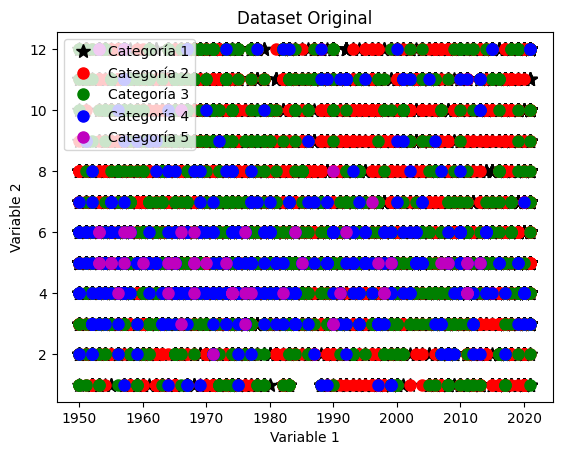

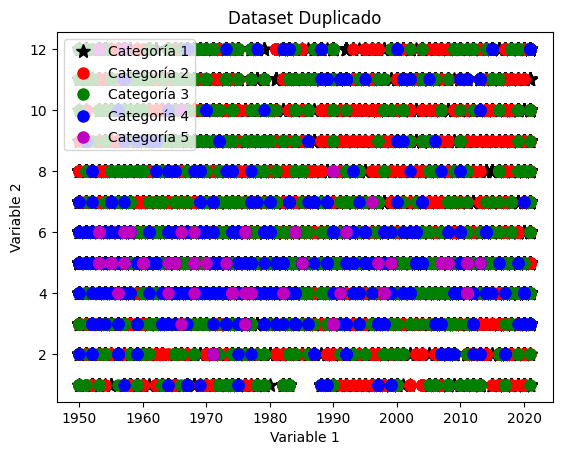

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plotData(X, y, title):
    # Crear una nueva figura
    fig = plt.figure()

    # Encuentra los índices de cada categoría en 'y'
    cat_1 = y == 1
    cat_2 = y == 2
    cat_3 = y == 3
    cat_4 = y == 4
    cat_5 = y == 5

    # Graficar ejemplos
    plt.plot(X[cat_1, 0], X[cat_1, 1], 'k*', lw=2, ms=10, label='Categoría 1')
    plt.plot(X[cat_2, 0], X[cat_2, 1], 'ro', lw=2, ms=8, label='Categoría 2')
    plt.plot(X[cat_3, 0], X[cat_3, 1], 'go', lw=2, ms=8, label='Categoría 3')
    plt.plot(X[cat_4, 0], X[cat_4, 1], 'bo', lw=2, ms=8, label='Categoría 4')
    plt.plot(X[cat_5, 0], X[cat_5, 1], 'mo', lw=2, ms=8, label='Categoría 5')

    # Adicionar etiquetas a los ejes
    plt.xlabel('Variable 1')
    plt.ylabel('Variable 2')
    plt.legend()
    plt.title(title)
    plt.show()

# Asumiendo que tus datasets están en DataFrames llamados datos_ds y datos_ds_nuevo
# Para el dataset original
X_original = datos_ds.iloc[:, :-1].values  # Todas las columnas menos la última para X
y_original = datos_ds.iloc[:, -1].values   # La última columna para 'mag' o 'y'
plotData(X_original, y_original, 'Dataset Original')

# Para el dataset duplicado
X_nuevo = datos_ds_nuevo.iloc[:, :-1].values  # Todas las columnas menos la última para X
y_nuevo = datos_ds_nuevo.iloc[:, -1].values   # La última columna para 'mag' o 'y'
plotData(X_nuevo, y_nuevo, 'Dataset Duplicado')



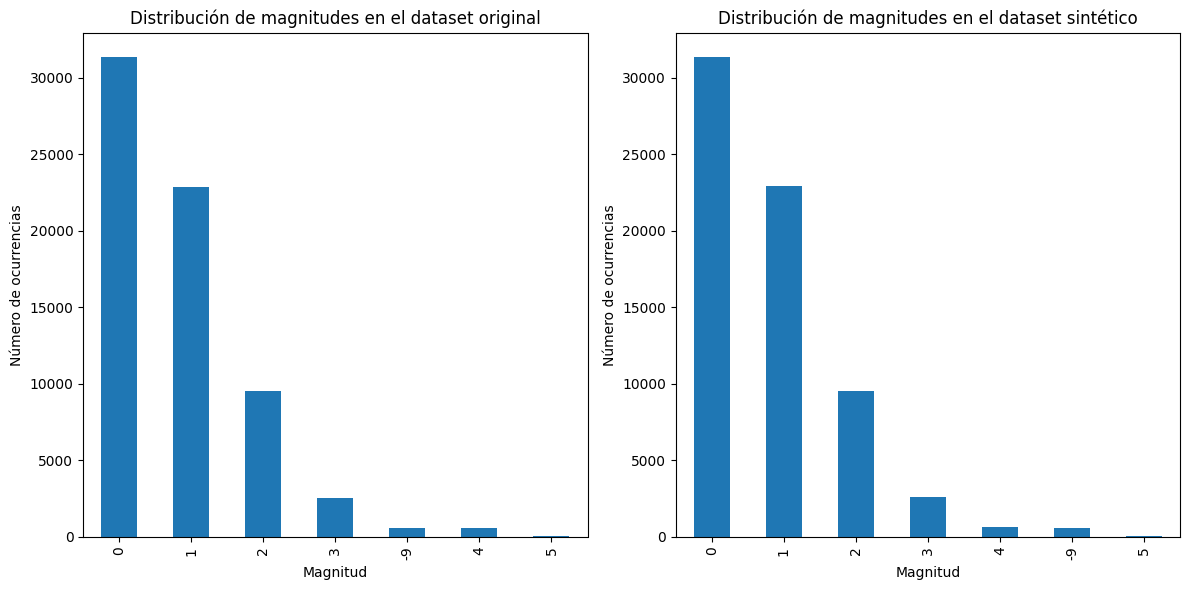

In [ ]:
import matplotlib.pyplot as plt

# Crear una gráfica de barras para la columna 'mag' en el dataset original
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
datos_ds['mag'].value_counts().plot(kind='bar')
plt.title('Distribución de magnitudes en el dataset original')
plt.xlabel('Magnitud')
plt.ylabel('Número de ocurrencias')

# Crear una gráfica de barras para la columna 'mag' en el dataset nuevo
plt.subplot(1, 2, 2)
datos_ds_nuevo['mag'].value_counts().plot(kind='bar')
plt.title('Distribución de magnitudes en el dataset sintético')
plt.xlabel('Magnitud')
plt.ylabel('Número de ocurrencias')

plt.tight_layout()
plt.show()


## 1 Clasificación multiclase


In [ ]:
# Verifica los valores originales de la columna 'mag'
print(datos_ds['mag'].head(10))

X = datos_ds.iloc[:, :-1].values  # Todas las columnas excepto la última
y = datos_ds.iloc[:, -1].values  # Si 'mag' es la última columna

# Asumimos que ya tienes las variables 'X' y 'y' asignadas como en el paso anterior

# Configurar las dimensiones de la capa de entrada y las etiquetas
input_layer_size = X.shape[1]  # El número de características en X (columnas)
num_labels = 5  # Puedes ajustar según la cantidad de clases que tengas en 'y'

# Reasignar valores de 'y' cambiar valores de 3 a 0:
#y[y == 3] = 0  # Este paso es opcional según el objetivo de la tarea

print(datos_ds.head())

# Imprimir las dimensiones de X e y para verificar
print(f"Número de muestras: {X.shape[0]}")
print(f"Número de características (Input Layer Size): {input_layer_size}")
print(f"Etiquetas únicas en y: {np.unique(y)}")

# Número de muestras
m = y.size

# Verificar las primeras filas de X e y
print("Primeras filas de X:")
print(X[:5, :])

print("\nPrimeras filas de y:")
print(y[:10])



0    3
1    3
2    1
3    3
4    2
5    2
6    2
7    2
8    2
9    2
Name: mag, dtype: int64
     yr  mo  dy  st  inj  fat   slat   slon   elat   elon  len  wid  month  \
0  1950   1   3  IL    3    0  39.10 -89.30  39.12 -89.23  3.6  130      1   
1  1950   1   3  MO    3    0  38.77 -90.22  38.83 -90.03  9.5  150      1   
2  1950   1   3  OH    1    0  40.88 -84.58   0.00   0.00  0.1   10      1   
3  1950   1  13  AR    1    1  34.40 -94.37   0.00   0.00  0.6   17      1   
4  1950   1  25  IL    0    0  41.17 -87.33   0.00   0.00  0.1  100      1   

   day tipo_tornado  victimas_M tamaño_torn  mag  
0    3            B           0     pequeño    3  
1    3            B           0      grande    3  
2    3            A           0    diminuto    1  
3   13            B           1    diminuto    3  
4   25            A           0    diminuto    2  
Número de muestras: 67558
Número de características (Input Layer Size): 17
Etiquetas únicas en y: [-9  0  1  2  3  4  5]
Primeras f

In [ ]:
# Duplicar el DataFrame
datos_ds_duplicado = pd.concat([datos_ds, datos_ds], ignore_index=True)

# Verificar el tamaño del DataFrame duplicado
print(f"Número de filas después de duplicar: {datos_ds_duplicado.shape[0]}")
print(f"Número de columnas después de duplicar: {datos_ds_duplicado.shape[1]}")

# Verificar las primeras filas para asegurarse de que la duplicación se realizó correctamente
print(datos_ds_duplicado.head())

# Verificar las últimas filas
print(datos_ds_duplicado.tail())

Número de filas después de duplicar: 135116
Número de columnas después de duplicar: 18
     yr  mo  dy  st  inj  fat   slat   slon   elat   elon  len  wid  month  \
0  1950   1   3  IL    3    0  39.10 -89.30  39.12 -89.23  3.6  130      1   
1  1950   1   3  MO    3    0  38.77 -90.22  38.83 -90.03  9.5  150      1   
2  1950   1   3  OH    1    0  40.88 -84.58   0.00   0.00  0.1   10      1   
3  1950   1  13  AR    1    1  34.40 -94.37   0.00   0.00  0.6   17      1   
4  1950   1  25  IL    0    0  41.17 -87.33   0.00   0.00  0.1  100      1   

   day tipo_tornado  victimas_M tamaño_torn  mag  
0    3            B           0     pequeño    3  
1    3            B           0      grande    3  
2    3            A           0    diminuto    1  
3   13            B           1    diminuto    3  
4   25            A           0    diminuto    2  
          yr  mo  dy  st  inj  fat     slat     slon     elat     elon    len  \
135111  2021  12  30  GA    0    0  31.1703 -83.3804  31.

In [ ]:
print(X[0,:])
print(y)

[1950 1 3 'IL' 3 0 39.1 -89.3 39.12 -89.23 3.6 130 1 3]
[3 3 1 ... 1 1 1]


In [ ]:
Fin del Codigo del Dataset Us_Tornado

In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

In [ ]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
# X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
X = X_norm
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

### 1.2 Visualización de los datos

In [ ]:
# def displayData(X, example_width=None, figsize=(10, 10)):
#     """
#     Muestra datos 2D almacenados en X en una cuadrícula apropiada.
#     """
#     # Calcula filas, columnas
#     if X.ndim == 2:
#         m, n = X.shape
#     elif X.ndim == 1:
#         n = X.size
#         m = 1
#         X = X[None]  # Promocionar a una matriz bidimensional
#     else:
#         raise IndexError('La entrada X debe ser 1 o 2 dimensinal.')

#     example_width = example_width or int(np.round(np.sqrt(n)))
#     example_height = n / example_width

#     # Calcula el numero de elementos a mostrar
#     display_rows = int(np.floor(np.sqrt(m)))
#     display_cols = int(np.ceil(m / display_rows))

#     fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
#     fig.subplots_adjust(wspace=0.025, hspace=0.025)

#     ax_array = [ax_array] if m == 1 else ax_array.ravel()

#     for i, ax in enumerate(ax_array):
#         ax.imshow(X[i].reshape(example_width, example_width, order='F'),
#                   cmap='Greys', extent=[0, 1, 0, 1])
#         ax.axis('off')

In [ ]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

# displayData(sel)

### 1.3 Vectorización de regresión logística

<a id="section1"></a>
#### 1.3.1 Vectorización de la funcion de costo

In [ ]:
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))

In [ ]:
def lrCostFunction(theta, X, y, lambda_):
    """
    Calcula el costo de usar theta como parámetro para la regresión logística regularizada y
    el gradiente del costo w.r.t. a los parámetros.

    Parametros
    ----------
    theta : array_like
        Parametro theta de la regresion logistica. Vector de la forma(shape) (n, ). n es el numero de caracteristicas
        incluida la intercepcion

    X : array_like
        Dataset con la forma(shape) (m x n). m es el numero de ejemplos, y n es el numero de
        caracteristicas (incluida la intercepcion).

    y : array_like
        El conjunto de etiquetas. Un vector con la forma (shape) (m, ). m es el numero de ejemplos

    lambda_ : float
        Parametro de regularización.

    Devuelve
    -------
    J : float
        El valor calculado para la funcion de costo regularizada.

    grad : array_like
        Un vector de la forma (shape) (n, ) que es el gradiente de la
        función de costo con respecto a theta, en los valores actuales de theta..
    """
#     alpha = 0.003
#     theta = theta.copy()
    # Inicializa algunos valores utiles
    m = y.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0

#     J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)
#     theta = theta - (alpha / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad
#    return J, theta

#### 1.3.3 Vectorización regularizada de la regresión logística


<a id="section2"></a>
### 1.4 Clasificacion One-vs-all


In [ ]:
def oneVsAll(X, y, num_labels, lambda_):
    """
    Trains num_labels logistic regression classifiers and returns
    each of these classifiers in a matrix all_theta, where the i-th
    row of all_theta corresponds to the classifier for label i.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). m is the number of
        data points, and n is the number of features. Note that we
        do not assume that the intercept term (or bias) is in X, however
        we provide the code below to add the bias term to X.

    y : array_like
        The data labels. A vector of shape (m, ).

    num_labels : int
        Number of possible labels.

    lambda_ : float
        The logistic regularization parameter.

    Returns
    -------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        (ie. `numlabels`) and n is number of features without the bias.
    """
    # algunas variables utiles
    m, n = X.shape

    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)

        all_theta[c] = res.x

    return all_theta

In [ ]:
lambda_ = 0.1
all_theta = oneVsAll(X, y, num_labels, lambda_)
print(all_theta.shape)

(3, 14)


In [ ]:
print(all_theta)

[[-5.9431167   1.09249539  0.62675823  1.428024    0.34141846  0.10314794
  -0.15578326 -3.05755875 -0.30526136 -1.12885295  2.07747754 -2.14176945
  -2.16418948  0.48815314]
 [-2.76714344  2.49719273  0.93966573  1.90491179 -2.81965561  0.29698877
   0.45125196  1.63676235 -0.29305502 -0.36107786 -0.13758089 -0.1271495
   1.91599118  3.10856368]
 [-3.04299407 -2.37084658 -1.20056052 -2.24760854  1.5297807   0.14407858
  -0.0378082   1.21702076  1.05250213  0.23120809 -4.38852946  1.71163052
  -0.08459958 -3.88470063]]


<a id="section3"></a>
#### 1.4.1 Prediccion One-vs-all


In [ ]:
def predictOneVsAll(all_theta, X):
    """
    Devuelve un vector de predicciones para cada ejemplo en la matriz X.
    Tenga en cuenta que X contiene los ejemplos en filas.
    all_theta es una matriz donde la i-ésima fila es un vector theta de regresión logística entrenada para la i-ésima clase.
    Debe establecer p en un vector de valores de 0..K-1 (por ejemplo, p = [0, 2, 0, 1]
    predice clases 0, 2, 0, 1 para 4 ejemplos).

    Parametros
    ----------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        and n is number of features without the bias.

    X : array_like
        Data points to predict their labels. This is a matrix of shape
        (m x n) where m is number of data points to predict, and n is number
        of features without the bias term. Note we add the bias term for X in
        this function.

    Devuelve
    -------
    p : array_like
        The predictions for each data point in X. This is a vector of shape (m, ).
    """

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

In [ ]:
print(X.shape)
pred = predictOneVsAll(all_theta, X)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
XPrueba = X[10:150, :].copy()
print(XPrueba.shape)
#print(np.ones((1)))
#print(XPrueba)
#p = np.zeros(1)
XPrueba = np.concatenate([np.ones((140, 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p)

# displayData(X[1002:1003, :])
print(y[10:150])

(178, 13)
Precision del conjuto de entrenamiento: 100.00%
(140, 13)
(140, 14)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
